## Credit Card Fraud Detection using CNN

Watch Full Video Here: https://youtu.be/XFnLN84Fz24

In [ ]:
#!pip install tensorflow-gpu==2.0.0-rc0
# Keep your eyes for update: https://www.tensorflow.org/

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.7.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balance Dataset 

In [8]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [9]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [10]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [11]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,164746.0,-0.876657,-0.586916,-1.095749,-1.285611,1.006631,-0.132231,0.203147,0.385406,-1.906365,...,-0.017737,-0.136587,0.093421,-0.341172,-0.561103,0.651494,0.002078,-0.000691,100.00,0
980,148582.0,-0.237701,0.993616,-0.539478,-0.785342,0.524401,-0.509562,0.566885,0.370221,0.013365,...,-0.289991,-0.837208,0.028887,-1.100284,-0.372900,0.214221,0.114693,0.022142,9.72,0
981,165317.0,2.050143,0.203026,-1.731782,0.512536,0.224356,-1.399053,0.264661,-0.369747,0.585460,...,0.198524,0.755984,-0.024602,-0.145830,0.248958,-0.094338,0.000783,-0.031969,5.15,0
982,73195.0,1.251891,0.389462,0.313362,0.688551,-0.317907,-1.054855,0.131238,-0.238530,-0.058946,...,-0.279372,-0.782849,0.119054,0.356496,0.236263,0.092434,-0.019641,0.032537,4.49,0


In [12]:
data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [13]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [15]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [18]:
X_train.shape

(787, 30)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

### Build CNN 

In [21]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


2022-03-30 22:33:00.457476: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-03-30 22:33:00.457530: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 22:33:00.457585: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterhub-nb-skasmani-40redhat-2ecom): /proc/driver/nvidia/version does not exist
2022-03-30 22:33:00.457951: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [23]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

/opt/app-root/lib64/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 0.7543 - accuracy: 0.6557 - val_loss: 0.6298 - val_accuracy: 0.8832
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4458 - accuracy: 0.8107 - val_loss: 0.5792 - val_accuracy: 0.8934
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4001 - accuracy: 0.8551 - val_loss: 0.5356 - val_accuracy: 0.9036
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3069 - accuracy: 0.8907 - val_loss: 0.5001 - val_accuracy: 0.9239
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.8856 - val_loss: 0.4617 - val_accuracy: 0.9289
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2791 - accuracy: 0.8971 - val_loss: 0.4265 - val_accuracy: 0.9340
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2468 - accuracy: 0.9111 - val_loss: 0.3888 - val_accuracy: 0.9340
Epoch 8/20
25/25 [=

In [25]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

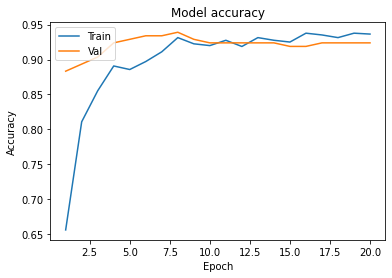

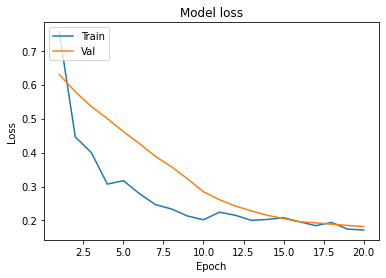

In [26]:
plot_learningCurve(history, epochs)

In [30]:



predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

In [31]:
cm_nn=confusion_matrix(y_test, y_pred)
cm_nn

array([[99,  0],
       [98,  0]])

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network model')

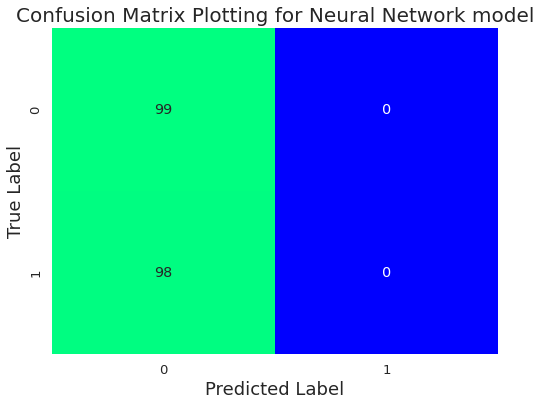

In [32]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm_nn, annot=True, fmt = 'g', cmap="winter", cbar = False)
plt.xlabel("Predicted Label", size = 18)
plt.ylabel("True Label", size = 18)
plt.title("Confusion Matrix Plotting for Neural Network model", size = 20)

### Adding MaxPool 

Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 1.3586 - accuracy: 0.5388 - val_loss: 0.6755 - val_accuracy: 0.6447
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 1.0607 - accuracy: 0.6112 - val_loss: 0.6343 - val_accuracy: 0.7005
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9230 - accuracy: 0.6366 - val_loss: 0.6067 - val_accuracy: 0.6548
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7747 - accuracy: 0.7001 - val_loss: 0.5895 - val_accuracy: 0.6396
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6142 - accuracy: 0.7433 - val_loss: 0.5775 - val_accuracy: 0.6548
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6110 - accuracy: 0.7433 - val_loss: 0.5619 - val_accuracy: 0.6751
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.7586 - val_loss: 0.5438 - val_accuracy: 0.6904
Epoch 8/50
25/25 [=

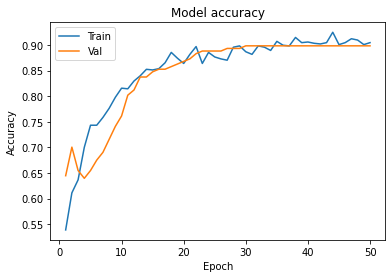

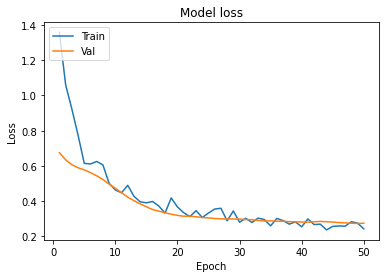

In [27]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

In [31]:
cm_nn=confusion_matrix(y_test, y_pred)
cm_nn

array([[99,  0],
       [98,  0]])

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network model')

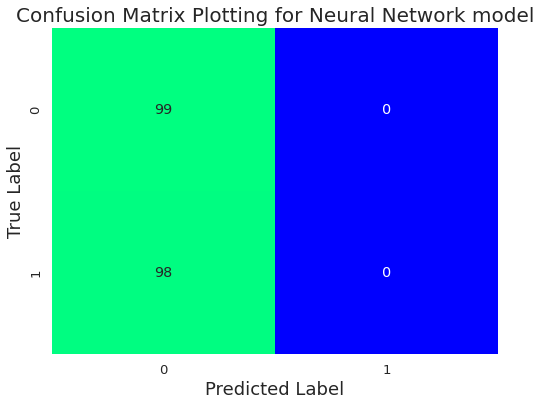

In [32]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm_nn, annot=True, fmt = 'g', cmap="winter", cbar = False)
plt.xlabel("Predicted Label", size = 18)
plt.ylabel("True Label", size = 18)
plt.title("Confusion Matrix Plotting for Neural Network model", size = 20)